# Chapter : 4

>* In machine learning, **vectors are often represented as column vectors**, which are 2D arrays with a single column. If θ and x are column vectors, then the hypothesis of our linear regression is `𝛉^T.x` instead of `𝛉.x`

>* **Training a model** means setting its parameters so that the model best fits the training set.

>* Learning algorithms will often optimize a **different loss function** during **training** than the **performance measure used to evaluate** the final model. (ex: sometimes, evaluation function is different from cost function for training.).
>>* In linear regression, they may be the same (mean-square-error used as cost-function to optimize the prameters & as evaluation metric).
>>* In Logistic regression, they differs as for cost-function, we use log loss & for evaluation we often use precision-recall.

>* For LinearRegression, sometimes we run gradient descent to minimize the cost function calculating the best parameters that do this.
>>* A different approach is to get a numeric-solution via forming different equations and solve them simultaneously."Dr Ayman Gomaa method"
>>* Another approach is to use the **Normal Equation** via `LinearRegression()` class in sckitLearn: 
`np.linalg.inv(X.T @ X) @ X.T @ y`
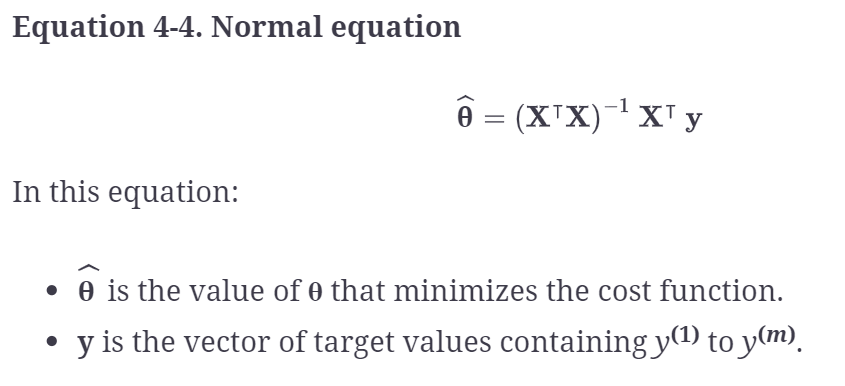

## Important: 😮 [Explanation is Here](https://docs.google.com/document/d/1bgouk9g73ZbhhQQGyTd4sXZFQ4fUZUDw8IU51YfZfy0/edit?usp=sharing)

>* `LinearRegression()` doesn't internally use batch gradient-descent. 
>* The `LinearRegression()` class is based on the `scipy.linalg.lstsq()`
________________________________________

### Note about closed form solution of linear regressoin:
#### [**🔎Closed-Form Solution of Linear Regression `AKA: Normal Equation`**](https://www.youtube.com/watch?v=VEluK6Mp340)
>* Note in the following, `x_` is a vector has x0=1, to be the bias term ... in linearRegression that implements gradient descent it is not necessarly. 
>* The **psuedo-inverse** is a method to calculate the inverse of non-invertible matrix. 
>* Sometimes this ordinary normal-equation may fall if the matrix `x.T @ x` **has no inverse** ... we overcome this by calculating the psuedo-inverse for this `x.T @ x` by the algebric method of **`SVD`**

In [31]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
x = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * x + np.random.randn(m, 1)  # column vector

x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + x + 2 + np.random.randn(m, 1)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

p= PolynomialFeatures(degree=2)

x_ = p.fit_transform(x)
print("shape of x_: ", x_.shape, "---> shape of x:", x.shape )
np.linalg.inv(x_.T @ x_) @ x_.T @ y  # if (x_.T @ x_) is not invertible, we use np.linalg.pinv ... "psuedo-inverse" 


shape of x_:  (100, 3) ---> shape of x: (100, 1)


array([[2.55973177],
       [1.0337634 ],
       [0.02147024]])

In [33]:
from sklearn.linear_model import LinearRegression

l = LinearRegression()
l.fit(x_,y)
l.coef_,l.intercept_

(array([[0.        , 1.0337634 , 0.02147024]]), array([2.55973177]))

_________________________________________________

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

__________________________________

#### Batch Gradient descent:
>* Gradient descent converges faster when the features have the same scale:
>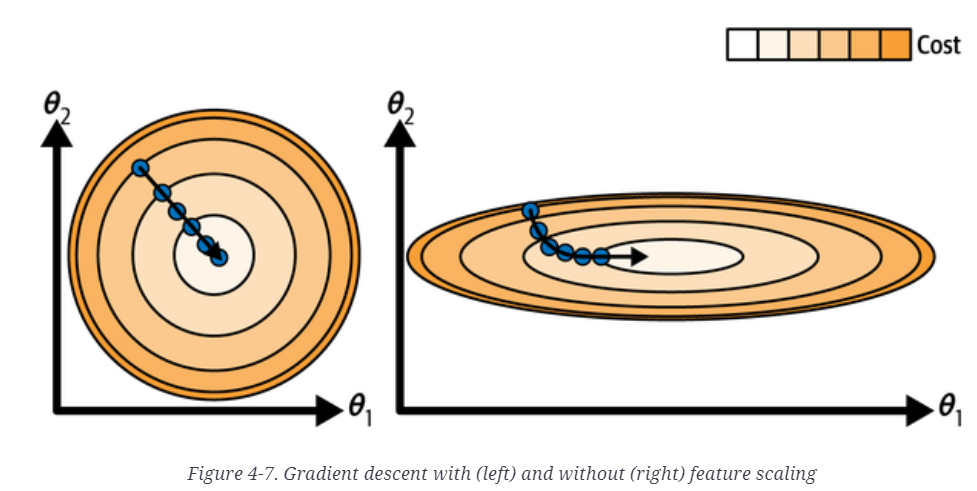

>* training a linear regression model when there are **hundreds of thousands of features** is **much faster** using gradient descent than using the Normal equation or SVD decomposition.

>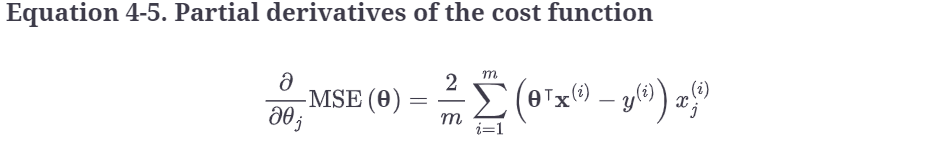
>* Trying out different learning rates:

>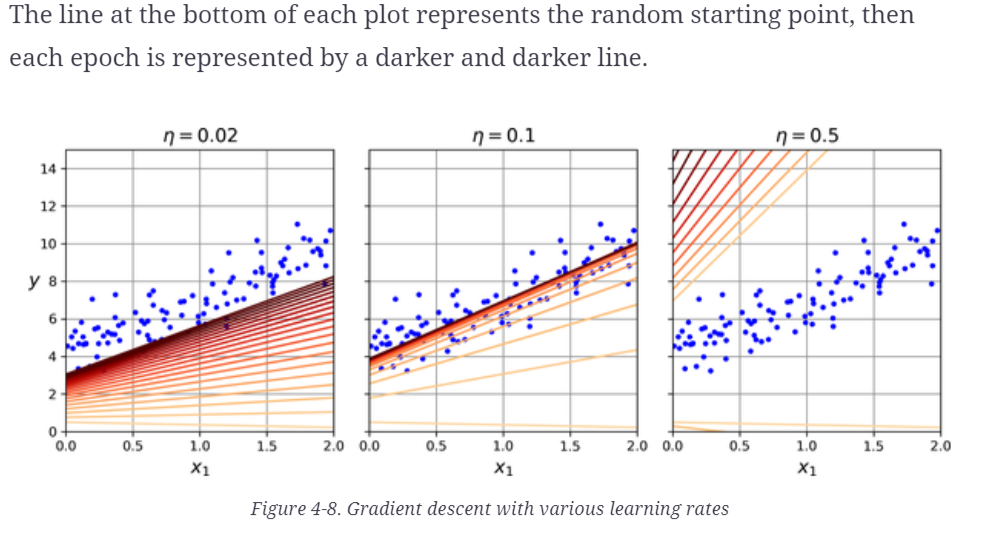
_________________________

#### Stochastic Gradient Descent:
>* It picks a ranodm instances and compute the gradient and **update the parameters** after each graudent-calculation for one instance instead of **updating the parameters after calculating the gradient of all instances**. 
>* **Randomness is good** to escape from local optima.
>* But **Randomness is bad** because it means that the algorithm can never settle at the minimum. 

>* One solution to this dilemma is to **gradually reduce the learning rate**. The steps start out large *(which helps make quick progress and escape local minima)*, then get smaller and smaller, allowing the algorithm to settle at the global minimum. The function that determines the learning rate at each iteration is called the `learning schedule`.
>>* **If the learning rate is reduced too quickly,** you may get stuck in a local minimum, or even end up frozen halfway to the minimum. 
>>* **If the learning rate is reduced too slowly,** you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.
>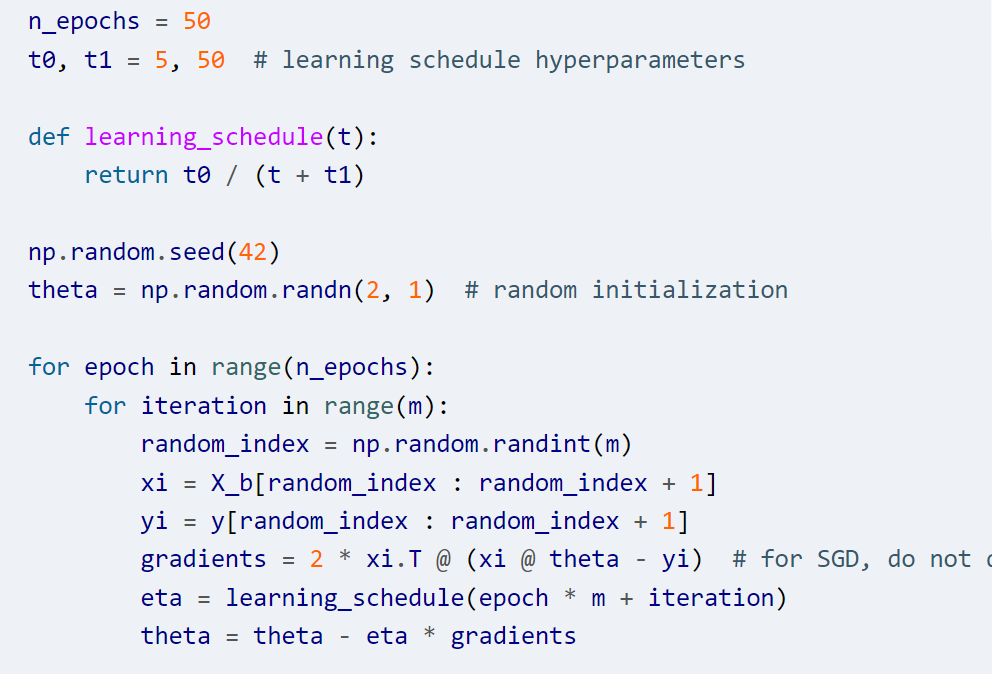
>* Note that since instances are picked randomly, **some instances may be picked several times per epoch, while others may not be picked at all.** If you want to be sure that the algorithm goes through every instance at each epoch, *another approach is to shuffle the training set* (making sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, this approach is more complex, and it generally does not improve the result.

>* `WARNNING:` When using stochastic gradient descent, **the training instances must be independent and identically distributed (IID)** to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). **If you do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.**

>* `LinearRegression()`, `LogisticRegression()` and other models by default uses **batch gradient descent**. If your data is large and want ot run stochastic gradient descent, use `SGDClassifier()` or `SGDRegressor`. It is by default train the SVM models but you can pass a hyperparameter `loss` to the value corresponding to the model you want.

>* Note also some estimators have `.fit()` and other estimators have `.partial_fit()` that you can call to run a single round of training on one or more instances, instead of trainning over all instances at a time.
__________________________

#### Mini-Batch Gradient Descent:

>* It is like stochastic but picking random subset of instances not only one instance per update. It is harder for it to scape local minimum unlike stochastic one.
>> 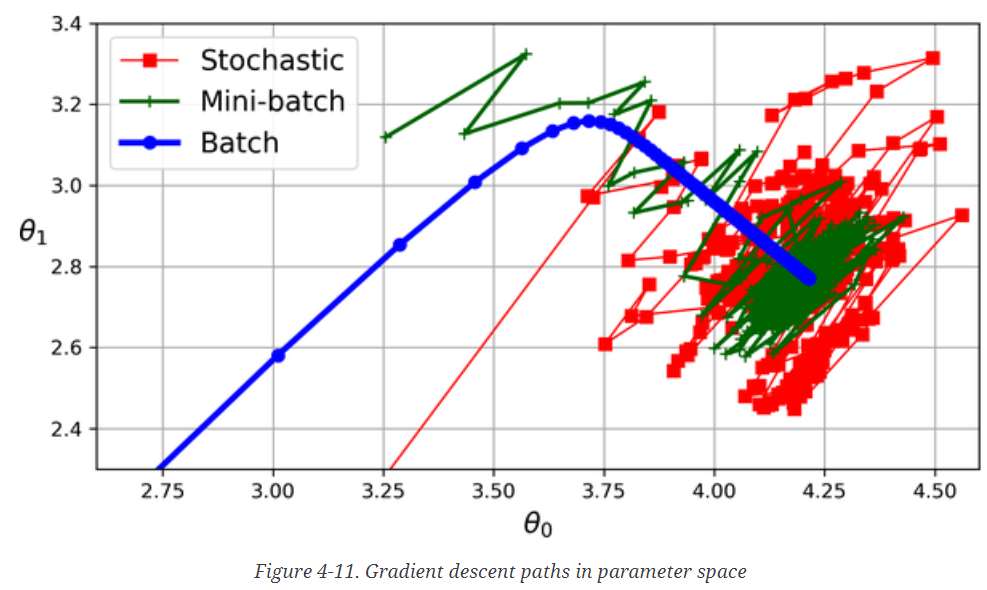
>* They all end up near the minimum, but batch GD’s path actually stops at the minimum, while both stochastic GD and mini-batch GD continue to walk around. However, **don’t forget that batch GD takes a lot of time to take each step**, and stochastic GD and mini-batch GD would also reach the minimum if you used a good **`learning schedule`** (the function that drive decreasing learning rate overtime).


______________________________________

#### Camparison Between algorithms used for Linear Regression (Normal Equn., SVD, Gradient Descent "batch, mini-batch, stochastic" ):
>* 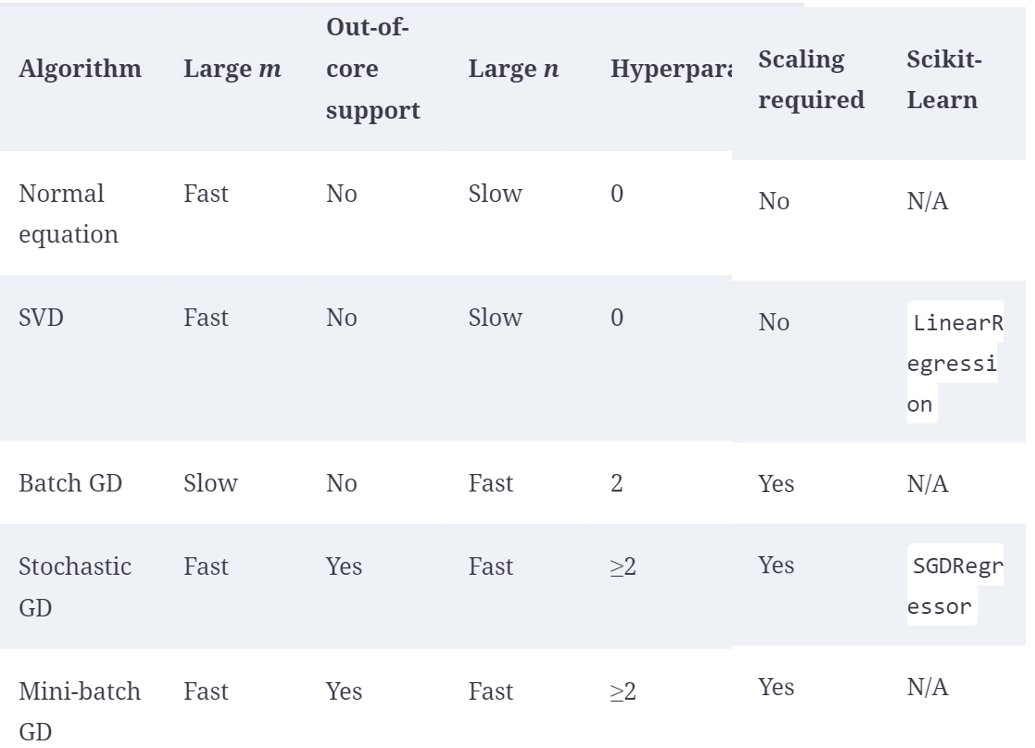
_______________________________

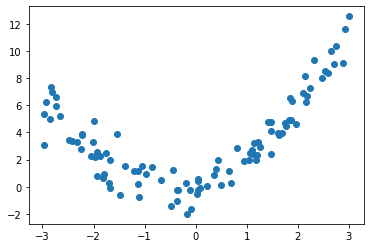

In [36]:
# polynomial regression:


np.random.seed(22)
m = 100

x = 6*np.random.rand(m,1) - 3 # to make it goes from -3 to 3 instead of ... from 0 to 1 # `rand()` uses uniform distribution
y = x**2 + x + np.random.randn(m,1) # `randn()` uses normal distribution instead of uniform as `rand()`


plt.plot(x,y,'o')

> To fit such model "Polynomial model", we have two ways:
>>* Using LinearRegression directly but feeding it edited features.(1st method)
>>* Using LinearRegression after using `PolynomialFeature` transformer then feed the trasformed features to the LinearRegression (2nd method)

score:  0.8985103416711544


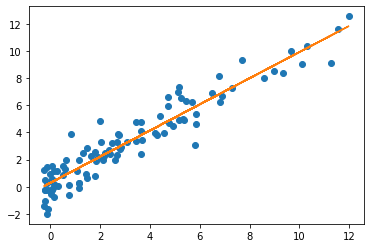

In [37]:
# to fit this model, we can use Linear regression or PolynomialFeatuers

np.random.seed(22)
x_ = x**2 + x 
y = y


l_reg = LinearRegression()
l_reg.fit(x_,y)
plt.plot(x_,y,'o')
plt.plot(x_,l_reg.predict(x_),'-')
print("score: ",l_reg.score(x_,y) )

score:  0.9015650777122048


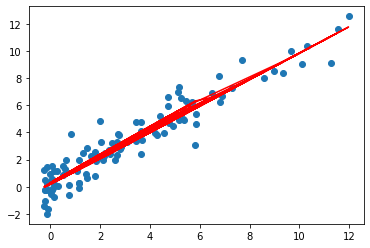

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias=False) # because we will enter this model to LinearRegression who calculates the bias
# General Quadratic function : f(x) = a.x^2 + b.x + c

x = x
y =y 

x_p = poly.fit_transform(x) # returned 2d array of x , x^2 


l_reg_as_poly = LinearRegression() 
l_reg_as_poly.fit(x_p, y)   

# ----------------------------------> we fed it to linear regression to calculate a, b, c ----> such as if you consider x as a feature and x^2 as another feature and the linear regression calculates their weights.

predictions = l_reg_as_poly.predict(x_p) 
print( "score: ", l_reg_as_poly.score(x_p,y) )


plt.plot(x_p[:,0]+x_p[:,1], y, 'o')
plt.plot(x_p[:,0]+x_p[:,1], predictions, 'r');

In [39]:
pol = PolynomialFeatures(degree = 3, include_bias=False) # because we will enter this model to LinearRegression who calculates the bias
u = np.c_[x,x+3]
pol.fit_transform(u)[0]


array([-1.74923678,  1.25076322,  3.0598293 , -2.18788103,  1.56440864,
       -5.35236594,  3.82712196, -2.73652113,  1.9567048 ])

>* The PolynomialFeatures can fed more than one feature... not only one ... and parameters they return are for ex (when x=3):
>>* `a^2`, `a^3`, `b^2`, and `b^3`, but also the combinations `a . b`, `a^2 . b`, and `a . b^2`
>>* it returns the terms of the **binomial theorem** `(x1 + x2)^3` ...
>* `PolynomialFeatures(degree=d)` transforms an array containing `n` features into an array containing **`(n + d)! / d!n!`**
>* We can judge **whether degree to use with PolynomialFeatures** by by trainning the model on different `cross-validation` folds.
____________________

#### Learning Curves:

>* They are plots of the model’s training error and validation error as a function of the training iteration:

>* SckitLearn has class `Learning_Curve` that evaluates the model at regular intervals during training on **both the training set and the validation set**, and plot the results.
>* If the model cannot be trained incrementally (i.e., if it does not support `partial_fit()` or `warm_start`), then you must train it several times on gradually larger subsets of the training set.

>* Scikit-Learn has a useful `learning_curve()` function to help with this: it trains and evaluates the model using cross-validation. By default it retrains the model on growing subsets of the training set, but if the model supports incremental learning you can set `exploit_incremental_learning=True` when calling `learning_curve()` and it will train the model incrementally instead. 
>* The function returns the **training set sizes** at which it evaluated the model, and **the training** and **validation scores** it measured for each size and for each cross-validation fold. 


>* This control of the training set "calculate the error each training iteration" is is what the method `partial_fit()` does:
>>* All Scikit-Learn estimators can be trained using the `fit()` method, but some estimators also have a `partial_fit()` method that you can call to run a single round of training on one or more instances (it ignores hyperparameters like `max_iter` or `tol`). 
>>* Repeatedly calling `partial_fit()` will gradually train the model. This is useful when you need more control over the training process. 
>>* Other models have a `warm_start` hyperparameter instead (and some have both): if you set `warm_start=True`, calling the `fit()` method on a trained model will not reset the model; it will just continue training where it left off, respecting hyperparameters like `max_iter` and `tol`. Note that `fit()` resets the iteration counter used by the learning schedule, while 
`partial_fit()` does not.


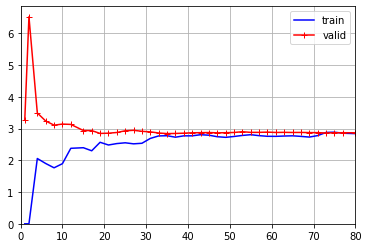

In [40]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), x, y,
               train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
               scoring = 'neg_root_mean_squared_error') 
train_sizes, train_scores.shape, valid_scores.shape

train_scores_1 = -train_scores.mean(axis=1)
valid_scores_1 = -valid_scores.mean(axis=1)






plt.plot(train_sizes,train_scores_1, 'b-', label ='train')
plt.plot(train_sizes,valid_scores_1, 'r-+', label ='valid')

plt.xlim(0,np.max(train_sizes))
plt.ylim(0,None)

plt.grid()
plt.legend()


>* This model is **underfitting**. To see why, **first let’s look at the training error**. When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.
>* Now **let’s look at the validation error**. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite large. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job of modeling the data, so the error ends up at a plateau, very close to the other curve.
>* Lets try use polynomial regression instead of just line:

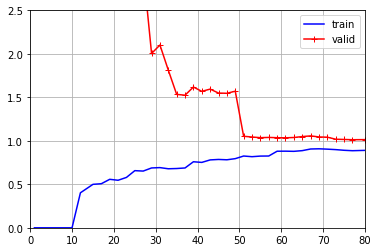

In [41]:
from sklearn.pipeline import make_pipeline
import sklearn
sklearn.set_config(display="diagram")


poly_pipe = make_pipeline(PolynomialFeatures(degree =10, include_bias=False),
                         LinearRegression())


train_sizes, train_scores, valid_scores = learning_curve(poly_pipe, x, y,
                                           train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                           scoring = 'neg_root_mean_squared_error') 

train_scores_2 = -train_scores.mean(axis=1)
valid_scores_2 = -valid_scores.mean(axis=1)






plt.plot(train_sizes,train_scores_2, 'b-', label ='train')
plt.plot(train_sizes,valid_scores_2, 'r-+', label ='valid')

plt.xlim(0,np.max(train_sizes))
plt.ylim(0,2.5)

plt.grid()
plt.legend();



These learning curves look a bit like the previous ones, but there are two very important differences:

>* The error on the training data is much lower than before.
>* There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an **overfitting** model. If you used a much larger training set, however, the two curves would continue to get closer.

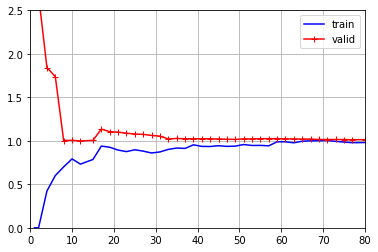

In [42]:
from sklearn.model_selection import learning_curve


poly_pipe_generalized = make_pipeline(PolynomialFeatures(degree =2, include_bias=False),
                         LinearRegression())


train_sizes, train_scores, valid_scores = learning_curve(poly_pipe_generalized, x, y,
                                           train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                           scoring = 'neg_root_mean_squared_error') 

train_scores_3 = -train_scores.mean(axis=1)
valid_scores_3 = -valid_scores.mean(axis=1)





plt.plot(train_sizes,train_scores_3, 'b-', label ='train')
plt.plot(train_sizes,valid_scores_3, 'r-+', label ='valid')

plt.xlim(0,np.max(train_sizes))
plt.ylim(0,2.5)

plt.grid()
plt.legend();


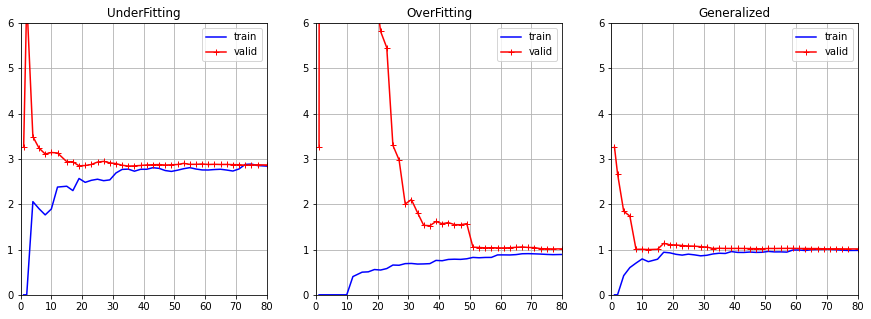

In [43]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
plt.plot(train_sizes,train_scores_1, 'b-', label ='train')
plt.plot(train_sizes,valid_scores_1, 'r-+', label ='valid')
plt.xlim(0,np.max(train_sizes))
plt.ylim(0,6) # the plot is clipped for focus but it has high validation score
plt.grid()
plt.legend()
plt.title("UnderFitting");

plt.subplot(132)
plt.plot(train_sizes,train_scores_2, 'b-', label ='train')
plt.plot(train_sizes,valid_scores_2, 'r-+', label ='valid')
plt.xlim(0,np.max(train_sizes))
plt.ylim(0,6) # the plot is clipped for focus but it has high validation score
plt.grid()
plt.legend()
plt.title("OverFitting");

plt.subplot(133)
plt.plot(train_sizes,train_scores_3, 'b-', label ='train')
plt.plot(train_sizes,valid_scores_3, 'r-+', label ='valid')
plt.xlim(0,np.max(train_sizes))
plt.ylim(0,6) # the plot is clipped for focus but it has high validation score
plt.grid()
plt.legend()
plt.title("Generalized");



#### There are three types of errors in machine learning:

###### Bias Error:
This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.⁠6

###### Variance Error:
This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many **`degrees of freedom`**`(such as a high-degree polynomial model)` is likely to have high variance and thus overfit the training data.

###### Irreducible error:
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).
____________________________________

### Ridge Regression (L2 Regularization): 

>* regularization is a technique used to reduce the effect of increased degree of freedom and handle overfitting.
> ![2](https://github.com/OmarAllam22/Images-for-notebooks/blob/main/1.PNG?raw=true)

In [45]:
# we can do ridge regression using sckit-learn in two ways:


m = 100 #number of trainning examples


#1st : (Using closed-form solution via Ridge() class) Θ = (X.T @ X  + alpha * A)^-1 @ X.T * y ... where A is the identity matrix
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky") # this `cholesky` solver implements the closed-form solution of using the equation
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])


#2nd: (using stochastic-gradient descent via SGDRegressor() class)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,       
                        max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(x, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])


# (there is not an explicit method in sckitlearn to implement batch-gradient descent in ridge regression) (مش متأكد أوى)


array([4.45938976])

>* We divided by **`alpha /m`** in `SGDRegressor()` to simulate the original ridge-quation ... this division is implictly implemented in `Ridge()` class.
>* Don't froget to do scaling ex: `StandardScaler()` before using ridge regression as it performs well when the features have the same scale.

>* The `RidgeCV` class also performs ridge regression, but it automatically tunes hyperparameters using cross-validation. It’s roughly equivalent to using `GridSearchCV`, but it’s optimized for ridge regression and runs much faster. Similarly, `LassoCV` & `ElasticNetCV`.

### LASSO Regression (L1 Regularization): 
>* **LASSO** stands for **L**east **A**bsolute **S**hrinkage and **S**election **O**perator regression.
>##### ➽ <font color='red'>(advantage of Lasso)</font> An important characteristic of lasso regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). This doesn't occur in L2-regularization weights of least important features are set to low number not zero.

> ![2](https://github.com/OmarAllam22/Images-for-notebooks/blob/main/2.PNG?raw=true)

>##### ➽ <font color='red'>(disadvantage of Lasso)</font> 
>>* Due the sparsity assumption follows by lasso, it may lead to erratic behaviour when the number of features are greater than the number of training examples.
>>* Due to the sparsity assumption, lasso may have difficulty in selecting the most important features. This is because Lasso tends to select only one feature from a group of strongly correlated features and ignore the rest.
>>* Ridge converge faster than lasso regression as shown: 
> ![5](https://github.com/OmarAllam22/Images-for-notebooks/blob/main/5.PNG?raw=true)

> Explanation is that: when using gradient descent, the gradient of the **l1 regularization term in the lasso-regression is always -1 or 1** "because it is an absolute function". Therefore the gradient doesn't decrease by time until approaches zero as in l2 term of the ridge regression. It bounces around the point reached by the converge from the MSE term in the lasso regression. Therefore, **Ridge regression converges faster that lasso regression**.
>>* `To keep gradient descent from bouncing around the optimum` at the end when using lasso regression, you need to **gradually reduce the learning rate during training**"this is done similar to learning schedule function". It will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge.
>>*
>>* Also `the absolute fucntion is not differentiable at zero`. Therefore, **we calculate the `sub-gradient`**.

>The lasso cost function is not differentiable at θi = 0 (for i = 1, 2, ⋯, n), but gradient descent still works if you use a subgradient vector: [**See This for more intution**](https://www.youtube.com/watch?v=3omfpgAxoFo)
>> Note: **subgradients aat a point are many not only one value**... but **gradient at a point is only one value**. So, how we use the subgradient as one value when using gradient descent, this can be done by the matrix multiplication of transpose of each-subgradient with its specified point-difference...**This results in a single sum.**
> <img src = "https://github.com/OmarAllam22/Images-for-notebooks/blob/main/6.PNG?raw=true" >

In [53]:
# you can do Lasso regression regularization as:

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

#or you can use:

Lasso_reg2 = SGDRegressor(penalty = 'l1', alpha = 0.1 * 2) # the book used this `SGDRegressor(penalty="l1", alpha=0.1)` didn't multiplied 2
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]]) , lasso_reg.predict([[1.5]])


(array([4.40841406]), array([4.40841406]))

________________

### ElasticNet regularization:

> It is a middle ground between ridge regression and lasso regression. The `regularization term is a weighted sum` of both ridge and lasso’s regularization terms, and **you can control the mix ratio r**. 
>> When r = 0, elastic net is equivalent to ridge regression, and when r = 1, it is equivalent to lasso regression.
> <img src = "https://github.com/OmarAllam22/Images-for-notebooks/blob/main/7.PNG?raw=true" >

In [55]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])


array([4.41523162])

### Regularization methods trade off:
> **It is almost always preferable to have at least a little bit of regularization**, so `generally you should avoid plain linear regression`. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer lasso or elastic net because they tend to reduce the useless features’ weights down to zero, as discussed earlier. In general, elastic net is preferred over lasso because lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

__________________________________

### Early stopping: (another technique to handle overfitting without regularization):
>* مش فاهم الفكرة أوى يعنى ايه ايبوك هنا خصوصا ان ده شالو ماشين ليرننج مش دييب ليرننج ... بس فيه رأيين فى بالى:
>* Epoch in general refers to training the model on the whole instances (either stochastic, mini-batch, or batch)

>* **`أول واحد`** Idea is that: if we have for example 1000 instance, we use `partial_fit()` to train not `fit()`. this partial_fit() trains for example on the first 200 instance to calculate the parameters "this is one epoch". For the second epoch, we use the previous parameters as initial parameters and train another new 200 example with the onld 200 example "400 instance total" This is another epoch. we train using many epochs and calculate validation error at each epoch. and stop before overfitting. (here we didn't use all the data, we used the quantity of data that makes our model generalizes). 

>* **`تانى واحد`** Idea is that we train our model on the whole data "one epoch" either batch, mini-batch or stocastic with initial parameters (initialized randomly with values near zero). Then calculate the train and validation error. And do another training with the initial parameters now are the previous parameters from the last epoch, and calculate the train and validation error this is another batch. After many epochs, you draw a graph like this:
> <img src = "https://github.com/OmarAllam22/Images-for-notebooks/blob/main/8.PNG?raw=true" >
>* we stop right before the validation error starts to increase again "indicates overfitting". at this point, we store the parameters of the model as best model.

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train, y_train, X_valid, y_valid = [...]  # split the quadratic dataset

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

> Note that the model is copied using `copy.deepcopy()`, because it copies both the model’s hyperparameters and the learned parameters. In contrast, `sklearn.base.clone()` only copies the model’s hyperparameters. 
>* [**➽ Great Source about shallow-copy vs deep-copy()**](https://www.programiz.com/python-programming/shallow-deep-copy)

### Notes about Logistic Regression (details provided in chapter_3 summary):

>* The log loss was not just pulled out of a hat. It can be shown mathematically (using Bayesian inference) that minimizing this loss will result in the model with the maximum likelihood of being optimal, **assuming that the instances follow a Gaussian** distribution around the mean of their class. `When you use the log loss`, **this is the implicit assumption you are making**. The more wrong this assumption is, the more biased the model will be.
>* Similarly, when we used the MSE to train linear regression models, we were implicitly assuming that the data was purely linear, plus some Gaussian noise. So, if the data is not linear (e.g., if it’s quadratic) or if the noise is not Gaussian (e.g., if outliers are not exponentially rare), then the model will be biased.

>* Unlike `LinearRegression`, **`there is no closed-form solution for`** `LogisticRegression()` to get the exact parameters that optimize the cost function. Instead gradient descent and other algorithms are used because the cost function is convex. 

>* The occasion is that the partial derivative of log-loss w.r.t `W` or `b` is the same as the one for the MSE cost function:
>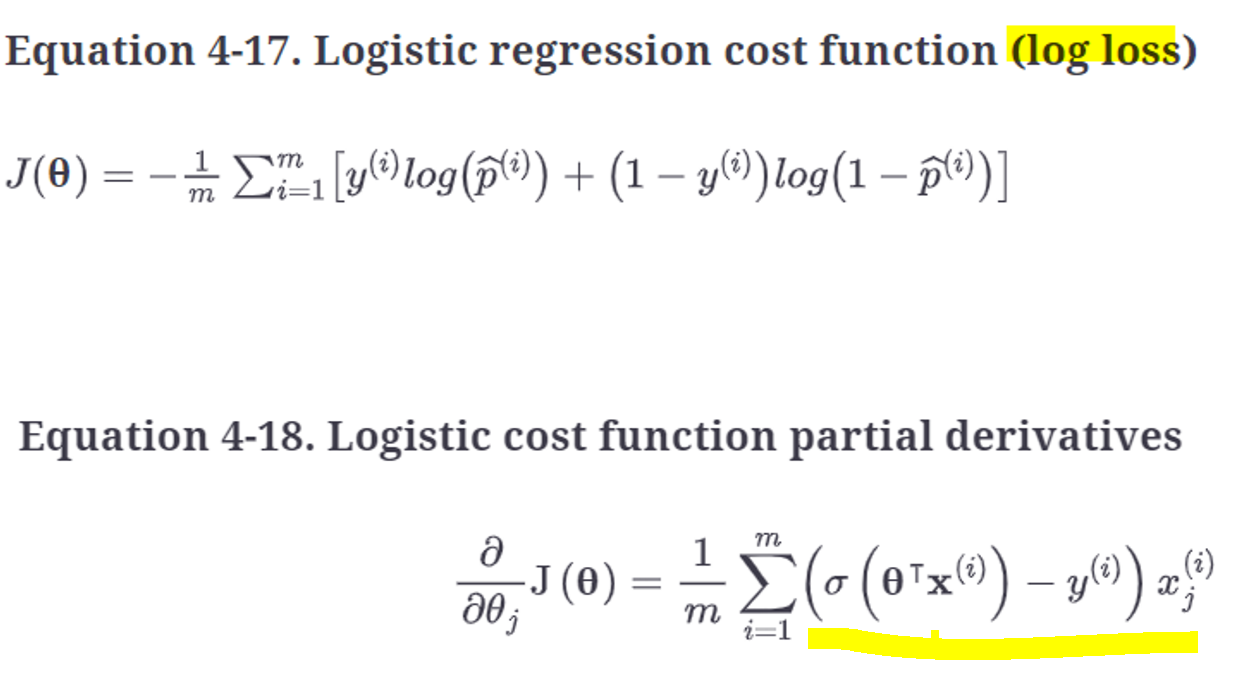

>* The hyperparameter controlling the regularization strength of a `Scikit-Learn LogisticRegression` model **is not alpha (as in other linear models)**, but its inverse: `C`. The higher the value of C, the less the model is regularized.

>* Just like the other linear models, logistic regression models can be regularized using ℓ1 or ℓ2 penalties. **`Scikit-Learn actually adds an ℓ2 penalty by default.`**

### Softmax Regression:
>* The softmax regression classifier predicts only one class at a time (i.e., it is multiclass, **not multioutput**), so it should be `used only with mutually exclusive classes`, such as different species of plants. **You cannot use it to recognize multiple people in one picture.**

>* We use categorical cross-entropy as our cost function here (`Note: we take each instances and test it on all classes then take the next example and test it on all classes and so on`) when we test each instance on all classes, it gives one value only corresponding to one class and for the other classes it is zero (**`this is because the target y is one-hot encoded means it is zero corresponding to all classes except one class which is one`**):
> <img src="https://github.com/OmarAllam22/Images-for-notebooks/blob/main/10.PNG?raw=true">

➽ [**SEE THIS !!! This is how categorical cross-entropy works**](https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372)

➽ [**This how we compute the derivative of categorical cross-entropy**](https://deepnotes.io/softmax-crossentropy)

>* <img src="https://github.com/OmarAllam22/Images-for-notebooks/blob/main/88.PNG?raw=true">

### Binary Cross-entropy Vs Categorical Cross-entropy:

>* Cross-entropy is a loss function used in machine learning for classification problems. The goal is to minimize the cross-entropy loss function to improve the accuracy of the model.
>* There are two commonly used types of cross-entropy loss functions: `binary cross-entropy` and `categorical cross-entropy`.

>* **`Binary cross-entropy`** is used when there are only two possible classes for the target variable, such as binary classification problems. In this case, the predicted probability distribution is compared to the true probability distribution, which is a vector with a 1 in the position corresponding to the true class and a 0 in the position corresponding to the other class.

>* **`Categorical cross-entropy`** is used when there are more than two possible classes for the target variable, such as multiclass classification problems. In this case, the predicted probability distribution is compared to the true probability distribution, which is a one-hot encoded vector representing the true class.

>* **`Sparse categorical cross-entropy`** **is a variant of categorical cross-entropy that is used `when the true class labels are not one-hot encoded`**, but instead are integers. This is often the case in natural language processing (NLP) tasks, where each class corresponds to a word in a vocabulary. In sparse categorical cross-entropy, the true class labels are converted to one-hot encoded vectors before computing the loss.



______________________________

## Linear Algebra Notes:

### ➽ SVD (Singular value decomposition):
>* The Singular Value Decomposition (SVD) can be applied to any real or complex matrix, not just singular matrices.
>* For any given matrix A (with dimensions m x n), the SVD factorizes it into three matrices:
>* A = U * Σ * V^T
>* where U is an m x m orthogonal matrix, Σ is an m x n diagonal matrix with non-negative elements (singular values) on the diagonal, and V is an n x n orthogonal matrix.
>* If A is a square matrix and has an inverse, then its singular values are all non-zero, and A is not a singular matrix.
>* However, if A is rectangular, then it is not necessarily a singular matrix, and some of its singular values may be zero.

>* An orthogonal matrix is a square matrix whose columns and rows are orthonormal, which means that they are normalized (i.e., have unit length) and are orthogonal (i.e., perpendicular) to each other. The product of an orthogonal matrix and its transpose is the identity matrix. Orthogonal matrices play an important role in linear algebra and have applications in many fields, such as computer graphics, signal processing, and quantum mechanics.

>* A singular matrix is a square matrix that does not have an inverse, meaning that its determinant is zero. A matrix is singular if and only if its rows or columns are linearly dependent. Singular matrices are also known as degenerate matrices, and they have important applications invarious fields, such as optimization, control theory, and physics.

>* A diagonal matrix is a square matrix whose elements outside the main diagonal are zero. The elements on the main diagonal can be any values, including zero or complex numbers. Diagonal matrices are used in various applications, such as solving systems of linear equations, diagonalization of matrices, and matrix exponentiation. Diagonal matrices have some important properties, such as being easy to invert and being closed under matrix multiplication.

>* Multiplying two orthogonal matrices does not always give the zero matrix. In fact, the product of two orthogonal matrices is another orthogonal matrix.
>* Multiplying an orthogonal matrix with its transpose gives the identity matrix. Specifically, if Q is an n x n orthogonal matrix.



_______________________

In [4]:
import numpy as np

np.random.rand(3,2) 

array([[0.82572709, 0.94028289],
       [0.69549624, 0.46740457],
       [0.86348426, 0.05242151]])